Fichier d'une petite exploration temporelle des données

In [1]:
#imports
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split 

## Data Recovery

In [2]:
data = pd.read_csv('data_pre.csv', index_col = 0, parse_dates=['days'])
data_h = pd.read_csv('data_hour.csv', index_col = 0)

In [3]:
data

,Electricity demand,production_nette,production stock,index,Stored phs,Stored battery,Stored methanation,days,cost_phs,cost_bat,cost_met,cost,Stored24phs,Stored24battery,Stored24methanation,stock_day_phs,stock_day_battery,stock_day_methanation
0,822.34,-238.12,244.84,0,100.000000,100.000000,80.483619,1,0.000608,0.003235,0.003928,77.705064,100.000000,0.000000,77.484681,0.000000,-100.000000,-2.998938
1,1011.52,-230.66,253.92,24,100.000000,0.000000,77.484681,2,0.000608,0.003087,0.004208,79.031328,91.461111,0.000000,73.569996,-8.538889,0.000000,-3.914685
2,1429.34,40.22,114.61,48,91.461111,0.000000,73.569996,3,0.000608,0.003182,0.003103,68.930476,88.772222,35.554357,73.343739,-2.688889,35.554357,-0.226256
3,1476.76,-25.91,162.37,72,88.772222,35.554357,73.343739,4,0.000608,0.003113,0.003438,71.594721,81.144444,100.000000,71.943798,-7.627778,64.445643,-1.399942
4,1464.01,-233.79,284.44,96,81.144444,100.000000,71.943798,5,0.000608,0.003112,0.004489,82.088458,100.000000,100.000000,67.112806,18.855556,0.000000,-4.830992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,1395.76,-70.92,124.39,157536,71.872222,71.216617,86.169233,360,0.000608,0.003087,0.003327,70.220758,56.366667,78.041543,85.131638,-15.505556,6.824926,-1.037596
6565,1387.42,13.67,90.03,157560,56.366667,78.041543,85.131638,361,0.000608,0.003087,0.003486,71.809862,100.000000,100.000000,83.575204,43.633333,21.958457,-1.556433
6566,1421.66,-169.79,169.77,157584,100.000000,100.000000,83.575204,362,0.000608,0.003107,0.003430,71.457317,48.972222,86.080388,82.201024,-51.027778,-13.919612,-1.374180
6567,1401.63,-178.55,254.32,157608,48.972222,86.080388,82.201024,363,0.000608,0.003172,0.003719,74.990028,31.444444,42.230914,79.885016,-17.527778,-43.849474,-2.316009


In [4]:
#passage en pourcentage
stor = ["phs","battery","methanation"]
volume= pd.Series([180 ,74.14, 12499.09], index = stor)

data_h["Stored phs"] = data_h["Stored phs"]/volume['phs']*100
data_h["Stored battery"] = data_h["Stored battery"]/volume['battery']*100
data_h["Stored methanation"] = data_h["Stored methanation"]/volume['methanation']*100
data_h

,offshore,onshore,pv,river,lake,biogas,phs,battery,methanation,Stored phs,Stored battery,Stored methanation,Electricity demand
0,5.82,15.78,0.0,1.27,0.0,0.0,0.0,0.0,5.82,100.000000,100.0,80.483619,28.69
1,5.74,16.61,0.0,1.30,0.0,0.0,0.0,0.0,7.56,100.000000,100.0,80.380092,31.21
2,5.61,17.10,0.0,1.11,0.0,0.0,0.0,0.0,3.88,100.000000,100.0,80.245602,27.70
3,5.64,17.78,0.0,1.12,0.0,0.0,0.0,0.0,3.45,100.000000,100.0,80.176637,27.99
4,5.72,18.42,0.0,1.21,0.0,0.0,0.0,0.0,2.81,100.000000,100.0,80.115272,28.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157675,5.11,32.99,0.0,2.79,13.0,0.0,0.0,0.0,0.00,76.333333,100.0,80.446577,38.61
157676,4.17,30.48,0.0,2.72,13.0,0.0,0.0,0.0,0.00,81.244444,100.0,80.474819,39.34
157677,3.19,27.04,0.0,2.45,13.0,0.0,0.0,0.0,0.00,86.150000,100.0,80.482979,36.71
157678,2.43,23.58,0.0,2.24,13.0,0.0,0.0,0.0,0.00,90.888889,100.0,80.482979,33.29


In [5]:
data['2diff'] = data.stock_day_methanation[1:].reset_index(drop=True) - data.stock_day_methanation[:-1].reset_index(drop=True)

## Work on stock level at the end of the day

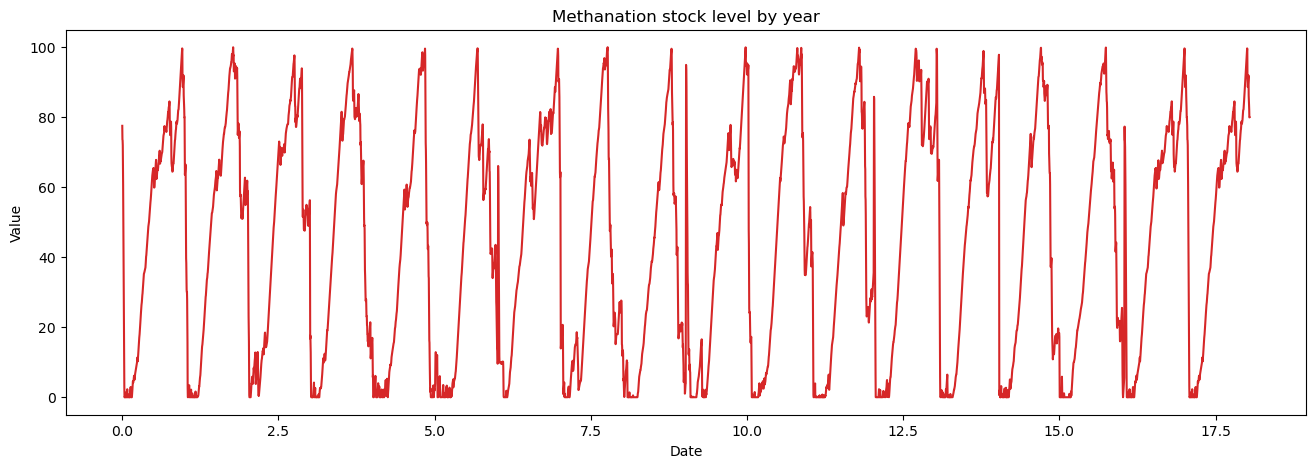

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  

plot_df(data, x=data.index/364, y=data.Stored24methanation, title='Methanation stock level by year') 

We can see a repetitive patern.

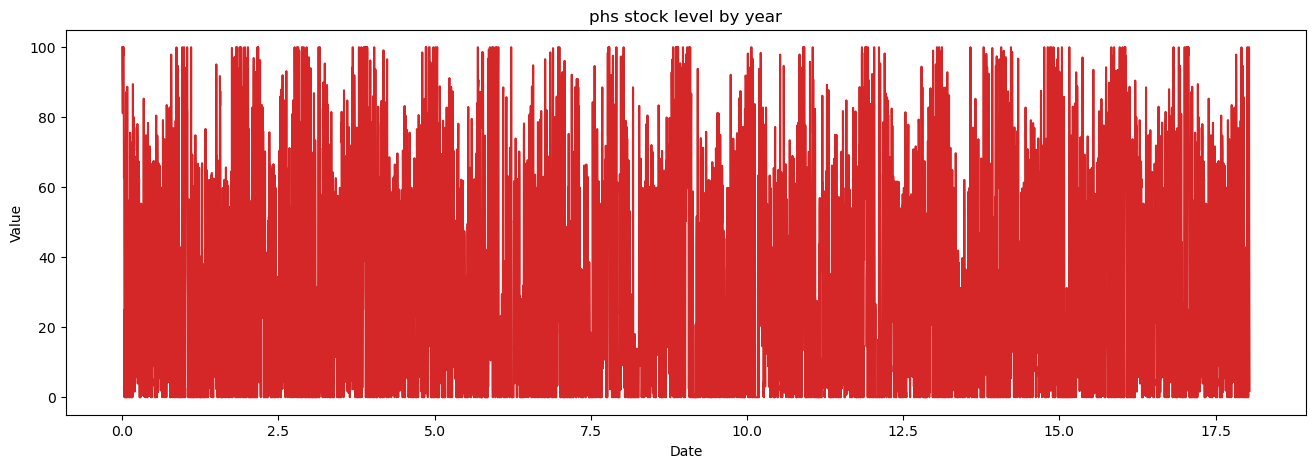

In [7]:

plot_df(data, x=data.index/364, y=data.Stored24phs, title='phs stock level by year') 

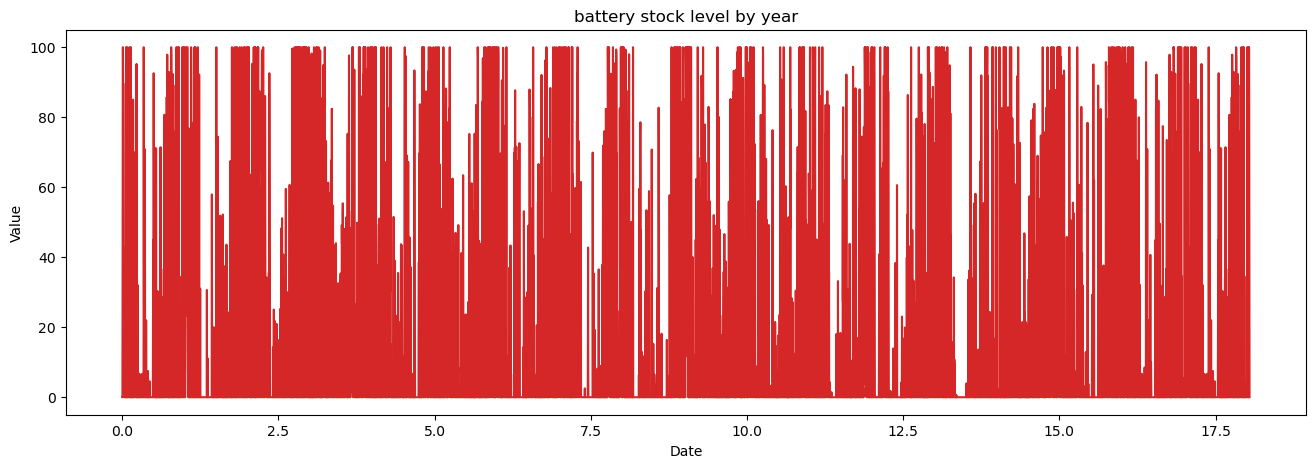

In [8]:

plot_df(data, x=data.index/364, y=data.Stored24battery, title='battery stock level by year') 

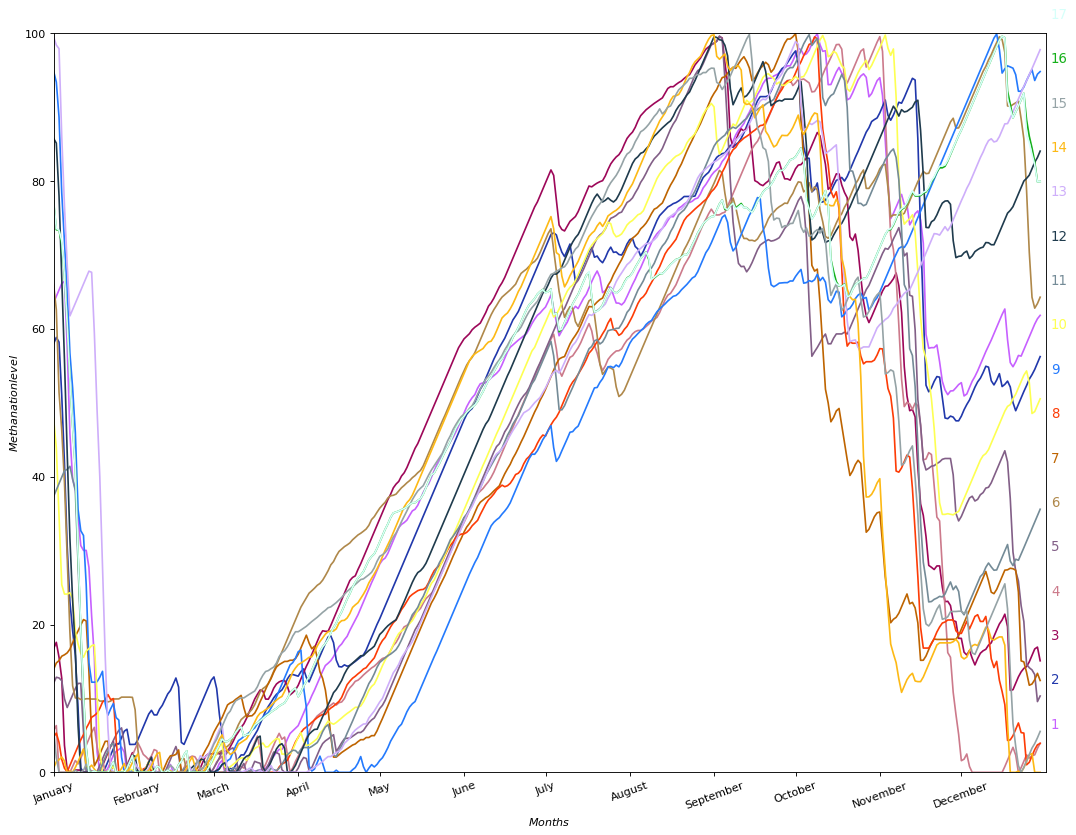

In [9]:
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), 18, replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24methanation', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$Methanation level$', xlabel='$Months$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()


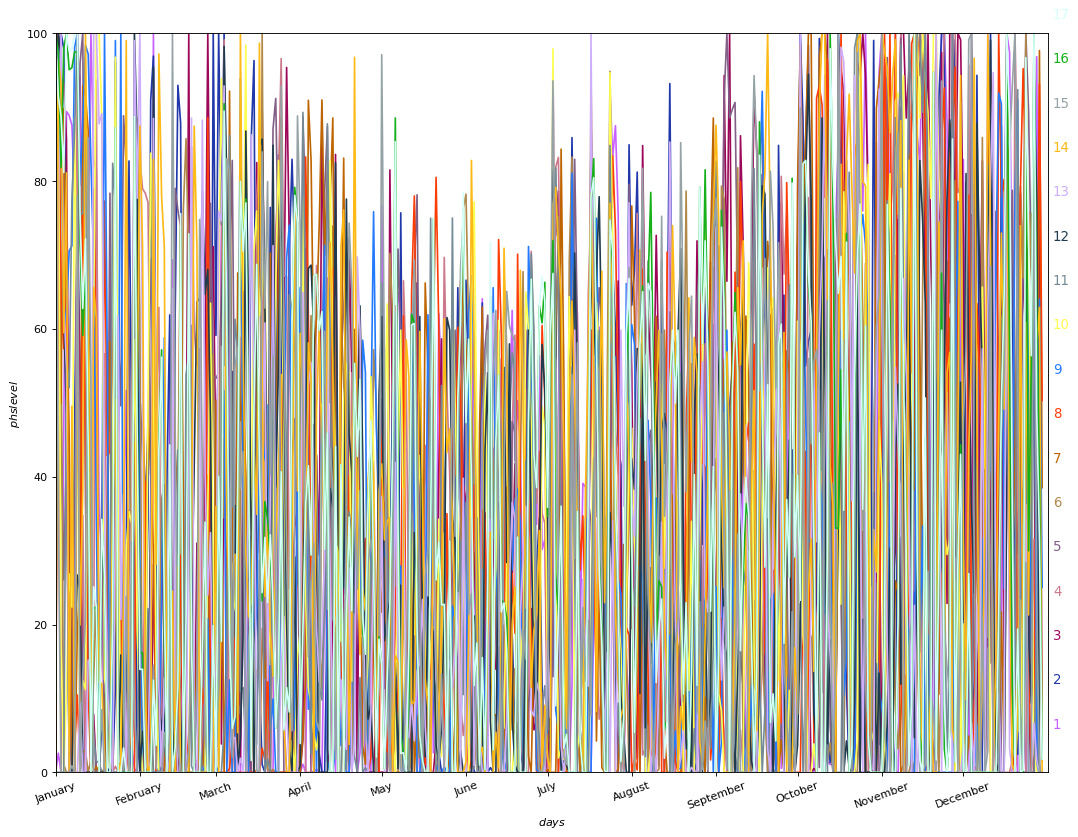

In [10]:
# Draw Plot dayly step
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24phs', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$phs level$', xlabel='$days$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()

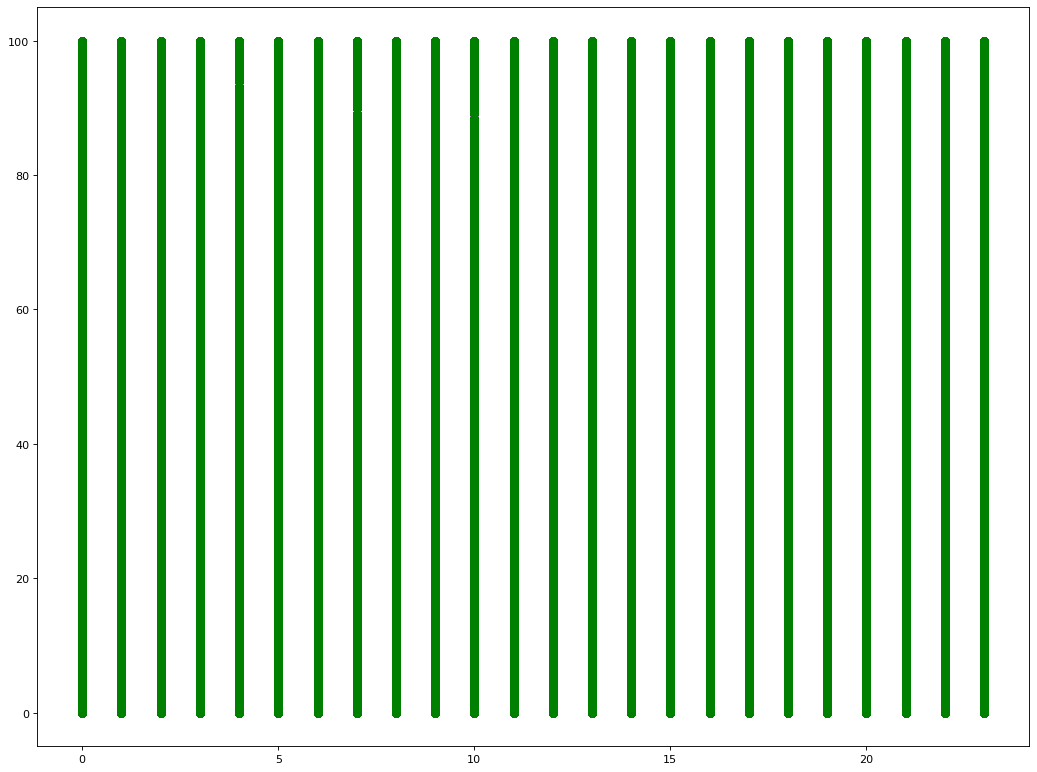

In [11]:
# Draw Plot dayly step
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    data_h2 = data_h[i * 24 * 365 : (1+i) * 24 * 365]
    plt.plot(data_h.index %24,data_h['Stored phs'], 'go' ) # , marker='gx')

plt.show()

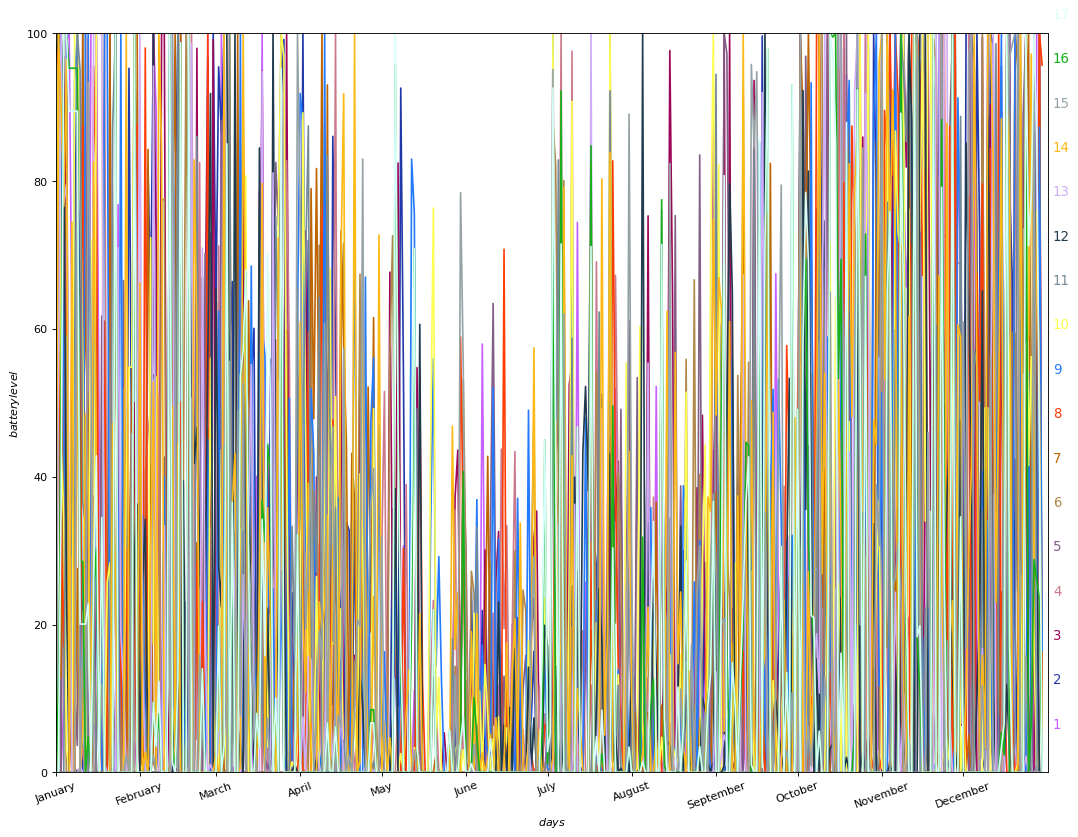

In [12]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24battery', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$battery level$', xlabel='$days$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()

We clearly observe a seasonal component in methanation storage.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

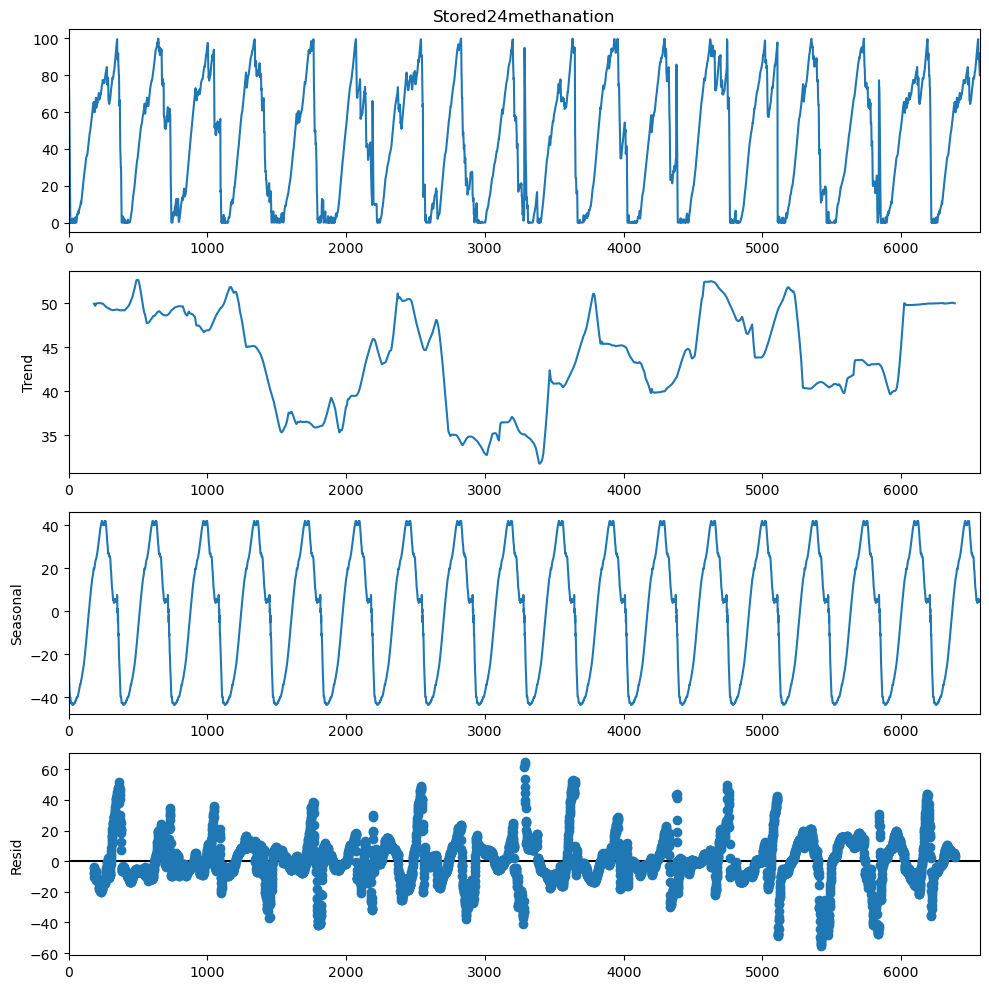

In [14]:
# Additive Decomposition
result_add = seasonal_decompose(data['Stored24methanation'], model='additive', period = 365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot()
plt.show()

[0.00000000e+00 1.52625153e-04 3.05250305e-04 ... 4.99694750e-01
 4.99847375e-01 5.00000000e-01]
frequence :  0.002747252747252747
period :  364.00000000000006


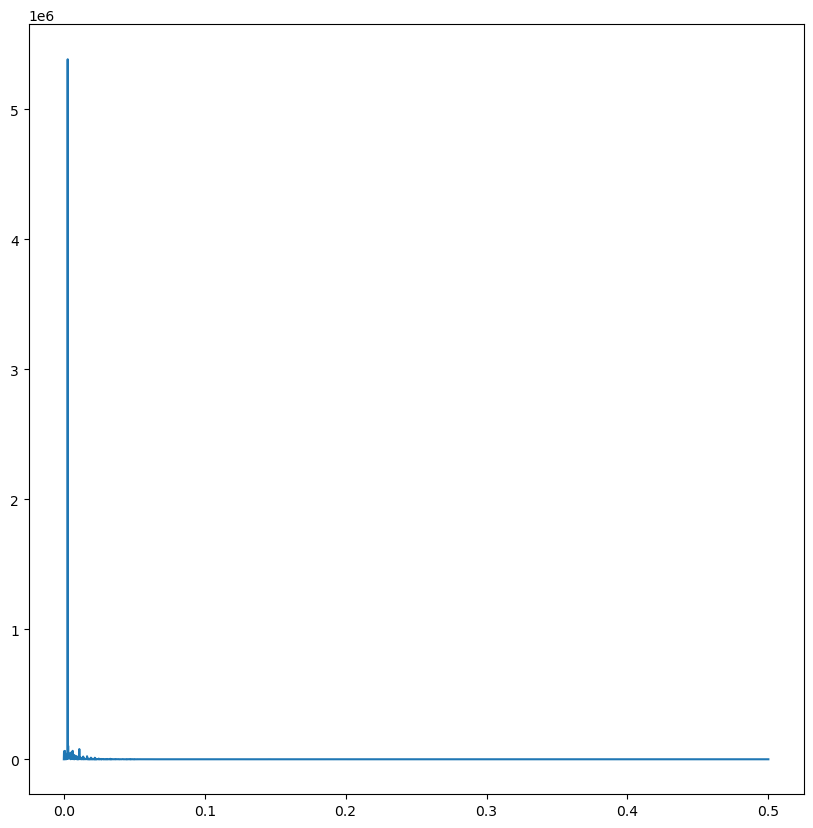

In [15]:
import scipy
f, pxx = scipy.signal.periodogram(data['Stored24methanation'])

plt.plot(f, pxx)
print (f)
freq_max = f[pxx.argmax()]
print('frequence : ', freq_max)
p = 1/freq_max
print('period : ' , p)
# Period is 1 year.
